In [39]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error

In [40]:
taxi_jan = pd.read_parquet("data/yellow_tripdata_2023-01.parquet")

In [41]:
# Question 1
len(taxi_jan.columns)

19

In [42]:
# Question 2
taxi_jan["ride_duration"] = (
    taxi_jan.tpep_dropoff_datetime - taxi_jan.tpep_pickup_datetime
)
taxi_jan["ride_duration"] = taxi_jan.ride_duration.apply(
    lambda td: td.total_seconds() / 60
)
taxi_jan["ride_duration"].std()

42.59435124195458

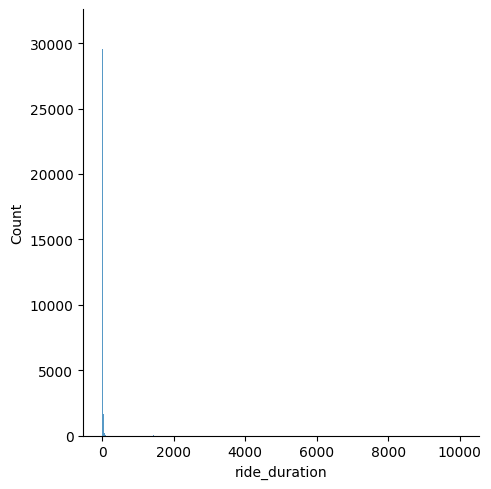

In [43]:
# Question 3
sns.displot(taxi_jan["ride_duration"])

In [44]:
taxi_jan_filter = taxi_jan[
    (taxi_jan.ride_duration >= 1) & (taxi_jan.ride_duration <= 60)
]

In [45]:
taxi_jan_filter.shape[0] / taxi_jan.shape[0]

0.9812202822125979

In [46]:
# Question 4
taxi_jan_filter.loc[:, ["PULocationID", "DOLocationID"]] = taxi_jan_filter[
    ["PULocationID", "DOLocationID"]
].astype(str)
train_dicts = taxi_jan_filter[["PULocationID", "DOLocationID"]].to_dict(
    orient="records"
)
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

/var/folders/mw/1mm63rs948ddpzc2_rb6mlgw0000gp/T/ipykernel_68386/3676102700.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['161' '43' '48' ... '114' '230' '262']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_jan_filter.loc[:, ["PULocationID", "DOLocationID"]] = taxi_jan_filter[
/var/folders/mw/1mm63rs948ddpzc2_rb6mlgw0000gp/T/ipykernel_68386/3676102700.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['141' '237' '238' ... '239' '79' '143']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  taxi_jan_filter.loc[:, ["PULocationID", "DOLocationID"]] = taxi_jan_filter[


In [47]:
X_train.shape

(3009173, 515)

In [48]:
# Question 5
y_train = taxi_jan_filter["ride_duration"].values
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = lr.predict(X_train)
root_mean_squared_error(y_train, y_pred)

7.649261934850555

In [50]:
# Question 6
taxi_feb = pd.read_parquet("data/yellow_tripdata_2023-02.parquet")

In [51]:
taxi_feb["ride_duration"] = (
    taxi_feb.tpep_dropoff_datetime - taxi_feb.tpep_pickup_datetime
).apply(lambda td: td.total_seconds() / 60)
taxi_feb_filter = taxi_feb[
    (taxi_feb.ride_duration >= 1) & (taxi_feb.ride_duration <= 60)
]

In [52]:
taxi_feb_filter.loc[:, ["PULocationID", "DOLocationID"]] = taxi_feb_filter[
    ["PULocationID", "DOLocationID"]
].astype(str)
val_dicts = taxi_feb_filter[["PULocationID", "DOLocationID"]].to_dict(orient="records")
X_val = dv.transform(val_dicts)

/var/folders/mw/1mm63rs948ddpzc2_rb6mlgw0000gp/T/ipykernel_68386/4119089115.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['142' '132' '161' ... '158' '79' '161']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_feb_filter.loc[:, ["PULocationID", "DOLocationID"]] = taxi_feb_filter[
/var/folders/mw/1mm63rs948ddpzc2_rb6mlgw0000gp/T/ipykernel_68386/4119089115.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['163' '26' '145' ... '143' '162' '140']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_feb_filter.loc[:, ["PULocationID", "DOLocationID"]] = taxi_feb_filter[


In [53]:
y_val = taxi_feb_filter["ride_duration"].values
y_val_pred = lr.predict(X_val)
root_mean_squared_error(y_val, y_val_pred)

7.811817745843695